In [3]:


# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
# Assuming you have a CSV file named 'bank_data.csv'
bank_data = pd.read_csv('6.csv', delimiter=';')

# Mapping the 'default' and 'y' columns
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [5]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# One-hot encode the categorical variables in X_train
X_train_encoded = pd.get_dummies(X_train)

# Fit the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [7]:
# One-hot encode the categorical variables in X_test
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of X_test_encoded with X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make predictions
y_pred = rf.predict(X_test_encoded)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8906077348066298


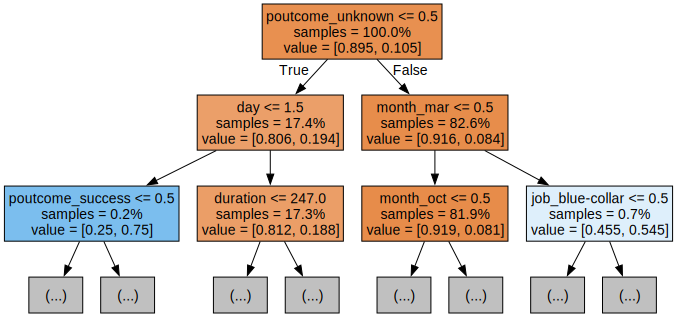

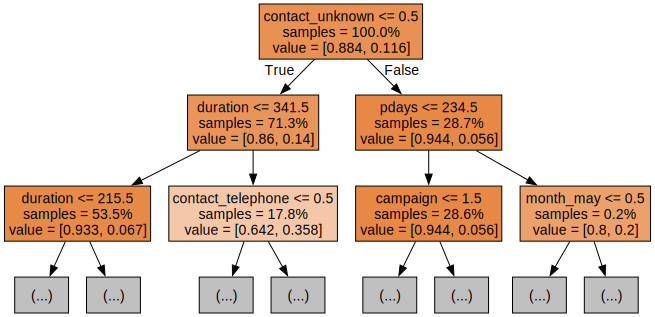

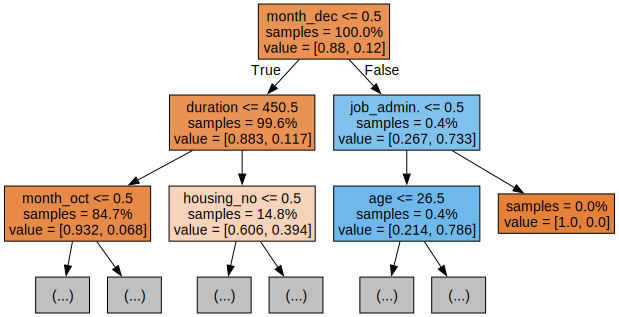

In [ ]:


for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_encoded.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)